In [1]:
%matplotlib inline
import cv2
import coremltools
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
import keras
from keras.models import model_from_json

import PIL
from PIL import Image

In [2]:
print("tensorflow version : ",tf.__version__)
print("keras version : ",keras.__version__)
print("coreml version : ",coremltools.SPECIFICATION_VERSION)

tensorflow version :  1.5.0
keras version :  2.1.3
coreml version :  1


In [3]:
# Load The Sample Model
with open("data/model.json",'r') as f:
    model = model_from_json(f.read())
model.load_weights("data/model.h5")   

In [4]:
# Sample Image
img = cv2.imread("data/sample.png")
img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img = img / 255.

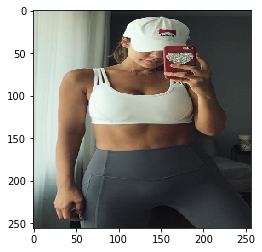

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


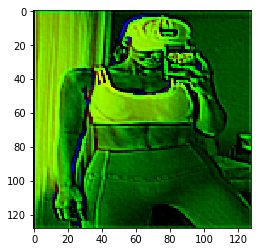

NAN Counts in Keras.predict : 0


In [5]:
out = model.predict(np.expand_dims(img,axis=0))

plt.imshow(img)
plt.show()
plt.imshow(out[0,:,:,:3])
plt.show()

print("NAN Counts in Keras.predict :",np.isnan(out.flatten()).sum())

In [6]:
for _ in range(20):
    coreml_model = coremltools.converters.keras.convert(
        model,
        input_names='image',
        image_input_names='image',
        output_names='output',
        image_scale=1/255.0,
    )

    coreml_inputs = {"image":Image.fromarray((img*255).astype(np.uint8))}
    output = coreml_model.predict(coreml_inputs,useCPUOnly=True)['output']
    
    print("- "*50)
    count=0
    for i in range(output.shape[0]):
        nb_nan = np.isnan(output[i].flatten()).sum()
        if nb_nan > 0:
            print("{:2d}th layer have {} nans".format(i,nb_nan))
            count+=1
    print("\ntotal NaN layer : {}".format(count))
    print("- "*50)

0 : input, <keras.engine.topology.InputLayer object at 0xd1af07278>
1 : conv0-conv1, <keras.layers.convolutional.Conv2D object at 0xd1af072e8>
2 : activation_1, <keras.layers.core.Activation object at 0xd1af07438>
3 : conv0-conv2, <keras.layers.convolutional.Conv2D object at 0xd1af074a8>
4 : activation_2, <keras.layers.core.Activation object at 0xd1af07550>
5 : conv0-deep_concat, <keras.layers.merge.Concatenate object at 0xd1af07908>
6 : conv0-pool, <keras.layers.pooling.MaxPooling2D object at 0xd1af07978>
7 : conv1-conv1, <keras.layers.convolutional.Conv2D object at 0xd1af079b0>
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
16th layer have 16384 nans
17th layer have 16384 nans
18th layer have 16384 nans
22th layer have 16384 nans
23th layer have 16384 nans

total NaN layer : 5
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
0 : input, <keras.engine.topology.InputLayer object at 

- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
30th layer have 16384 nans

total NaN layer : 1
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 
0 : input, <keras.engine.topology.InputLayer object at 0xd1af07278>
1 : conv0-conv1, <keras.layers.convolutional.Conv2D object at 0xd1af072e8>
2 : activation_1, <keras.layers.core.Activation object at 0xd1af07438>
3 : conv0-conv2, <keras.layers.convolutional.Conv2D object at 0xd1af074a8>
4 : activation_2, <keras.layers.core.Activation object at 0xd1af07550>
5 : conv0-deep_concat, <keras.layers.merge.Concatenate object at 0xd1af07908>
6 : conv0-pool, <keras.layers.pooling.MaxPooling2D object at 0xd1af07978>
7 : conv1-conv1, <keras.layers.convolutional.Conv2D object at 0xd1af079b0>
- - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - - 

total NaN layer : 0
- - - - - - - - - - - - - - - - - - - - -